In [29]:
# Importing Necessary Modules

import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

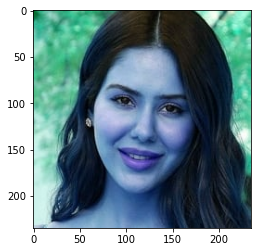

In [30]:
img=cv2.imread('C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\test\\1.jpg')
plt.imshow(img)
plt.show()

In [31]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(235, 235)

In [32]:
gray

array([[ 82,  88,  99, ..., 227, 217, 214],
       [ 77,  81,  90, ..., 221, 209, 204],
       [ 74,  76,  80, ..., 213, 199, 191],
       ...,
       [216, 215, 212, ...,  49,  50,  49],
       [215, 214, 210, ...,  50,  52,  54],
       [215, 212, 208, ...,  44,  46,  49]], dtype=uint8)

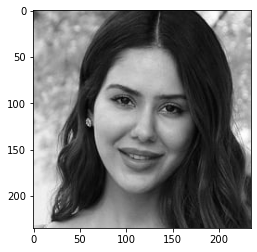

In [33]:
plt.imshow(gray,cmap='gray')
plt.show()

In [34]:
# Code For Importing Classifiers                            ---------------IMP--------
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [37]:
# Function to Get Cropped Image That Have Two Eyes
def required_img(img_path):
    img=cv2.imread(img_path)
    try:
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces=face_cascade.detectMultiScale(gray,1.3,5)             # For Face Detection
    
        for (x,y,w,h) in faces:
            roi_gray=gray[y:y+h,x:x+w]
            roi_color=img[y:y+h,x:x+w]
        
            eyes=eye_cascade.detectMultiScale(roi_gray)            # for Eyes Detection
            if len(eyes)>=2:
                return roi_color
    except:
        pass

In [38]:
# Getting Cropped Image
cropped_image=required_img('C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\test\\1.jpg')
cropped_image

array([[[ 73, 178, 133],
        [ 73, 177, 130],
        [ 71, 173, 125],
        ...,
        [ 14,  22,  29],
        [ 12,  20,  27],
        [  8,  17,  26]],

       [[ 75, 179, 132],
        [ 75, 177, 129],
        [ 72, 172, 124],
        ...,
        [ 15,  23,  30],
        [ 13,  21,  28],
        [  8,  17,  26]],

       [[ 77, 182, 131],
        [ 68, 171, 120],
        [ 71, 172, 121],
        ...,
        [ 12,  19,  28],
        [ 12,  19,  28],
        [ 13,  20,  29]],

       ...,

       [[ 11,  25,  48],
        [ 18,  32,  54],
        [ 17,  31,  53],
        ...,
        [ 21,  36,  52],
        [ 12,  27,  43],
        [ 13,  23,  40]],

       [[ 12,  26,  49],
        [ 18,  30,  54],
        [ 16,  29,  51],
        ...,
        [ 20,  35,  51],
        [  9,  24,  40],
        [ 11,  22,  36]],

       [[ 12,  26,  49],
        [ 17,  29,  53],
        [ 13,  26,  48],
        ...,
        [ 21,  36,  52],
        [  7,  22,  38],
        [  8,  19,  33]]

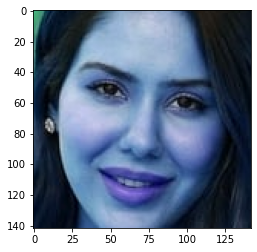

In [39]:
plt.imshow(cropped_image)
plt.show()

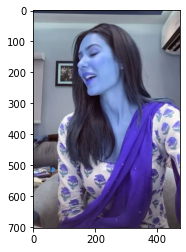

In [40]:
# Testing Function On Other Images
test=cv2.imread('C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\test\\3.jpg')
plt.imshow(test)
plt.show()

In [41]:
crop=required_img('C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\test\\3.jpg')
crop

In [42]:
# Setting Paths
path_to_data='C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\dataset\\'
path_to_cr_data='C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\cropped\\'

In [43]:
# Code To Store All Sub Directory Names in An List
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\dataset\\neeru-bajwa',
 'C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\dataset\\ranjit-bawa',
 'C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\dataset\\sartaj',
 'C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\dataset\\sidhu-moose-wala',
 'C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\dataset\\sonam-bajwa',
 'C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\dataset\\tarsem-jassar']

In [44]:
# Code To Generate Cropped Folder If Already Exist Remove It & Generate New One
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [45]:
# Code To Travers Image Directories
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = required_img(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1 

neeru-bajwa
Generating cropped images in folder:  C:\Users\sandh\OneDrive\Desktop\Image_Classification\cropped\neeru-bajwa
ranjit-bawa
Generating cropped images in folder:  C:\Users\sandh\OneDrive\Desktop\Image_Classification\cropped\ranjit-bawa
sartaj
Generating cropped images in folder:  C:\Users\sandh\OneDrive\Desktop\Image_Classification\cropped\sartaj
sidhu-moose-wala
Generating cropped images in folder:  C:\Users\sandh\OneDrive\Desktop\Image_Classification\cropped\sidhu-moose-wala
sonam-bajwa
Generating cropped images in folder:  C:\Users\sandh\OneDrive\Desktop\Image_Classification\cropped\sonam-bajwa
tarsem-jassar
Generating cropped images in folder:  C:\Users\sandh\OneDrive\Desktop\Image_Classification\cropped\tarsem-jassar


In [46]:
# Code For Wavelet Transformation On Images
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

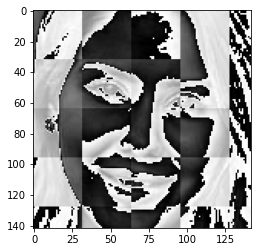

In [47]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')
plt.show()

# You can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier
(3) Preprocessing: Load image, detect face. If eyes >=2, then save and crop the face region
Lets write a python function that can take input image and returns cropped image (if face and eyes >=2 are detected)

In [48]:
celebrity_file_names_dict

{'neeru-bajwa': ['C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\cropped\\neeru-bajwa/neeru-bajwa1.png',
  'C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\cropped\\neeru-bajwa/neeru-bajwa2.png',
  'C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\cropped\\neeru-bajwa/neeru-bajwa3.png',
  'C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\cropped\\neeru-bajwa/neeru-bajwa4.png',
  'C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\cropped\\neeru-bajwa/neeru-bajwa5.png',
  'C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\cropped\\neeru-bajwa/neeru-bajwa6.png',
  'C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\cropped\\neeru-bajwa/neeru-bajwa7.png',
  'C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\cropped\\neeru-bajwa/neeru-bajwa8.png',
  'C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\cropped\\neeru-bajwa/neeru-bajwa9.png',
  'C:\\Users\\sandh\\OneDrive\\Desktop\\Image_Classification\\cropp

In [49]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'neeru-bajwa': 0,
 'ranjit-bawa': 1,
 'sartaj': 2,
 'sidhu-moose-wala': 3,
 'sonam-bajwa': 4,
 'tarsem-jassar': 5}

# Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and Y now

In [50]:
X, Y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        try:
            img = cv2.imread(training_image)
            scalled_raw_img = cv2.resize(img, (32, 32))
            img_har = w2d(img,'db1',5)
            scalled_img_har = cv2.resize(img_har, (32, 32))
            combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
            X.append(combined_img)
            Y.append(class_dict[celebrity_name])   
        except:
            pass

In [51]:
len(X)

382

In [53]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(382, 4096)

In [54]:
X[0]

array([ 19.,  21.,  21., ..., 252.,   0., 228.])

# Data cleaning process is done. Now we are ready to train our model
We will use SVM with rbf kernel tuned with heuristic finetuning

In [55]:
# Importing neccesary Modules
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, Y_train)
pipe.score(X_test, Y_test)

0.6354166666666666

In [57]:
print(classification_report(Y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.65      0.85      0.74        33
           1       0.50      0.29      0.36         7
           2       0.38      0.60      0.46        10
           3       0.80      0.42      0.55        19
           4       0.62      0.50      0.55        16
           5       0.90      0.82      0.86        11

    accuracy                           0.64        96
   macro avg       0.64      0.58      0.59        96
weighted avg       0.66      0.64      0.63        96



# Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [58]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [59]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [60]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, Y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.716697,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.548941,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.688566,{'logisticregression__C': 10}


In [62]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=10, solver='liblinear'))])}

In [63]:
best_estimators['svm'].score(X_test,Y_test)

0.6354166666666666

In [64]:
best_estimators['random_forest'].score(X_test,Y_test)

0.4791666666666667

In [65]:
best_estimators['logistic_regression'].score(X_test,Y_test)

0.6770833333333334

In [66]:
best_clf = best_estimators['logistic_regression']

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, best_clf.predict(X_test))
cm

array([[24,  1,  0,  3,  4,  1],
       [ 0,  5,  0,  0,  0,  2],
       [ 1,  2,  2,  2,  2,  1],
       [ 1,  0,  1, 14,  1,  2],
       [ 2,  0,  1,  2, 11,  0],
       [ 0,  2,  0,  0,  0,  9]], dtype=int64)

Text(69.0, 0.5, 'Truth')

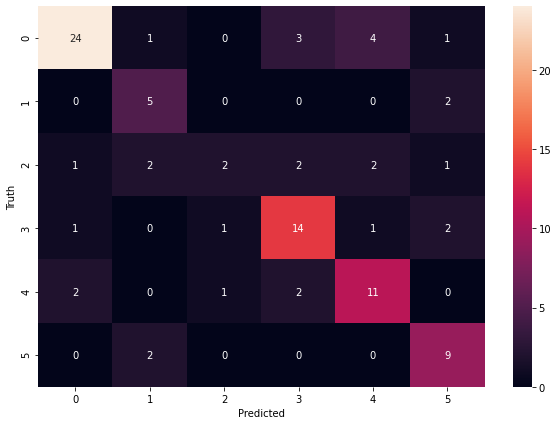

In [68]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [69]:
class_dict

{'neeru-bajwa': 0,
 'ranjit-bawa': 1,
 'sartaj': 2,
 'sidhu-moose-wala': 3,
 'sonam-bajwa': 4,
 'tarsem-jassar': 5}

# Saving Trained Model

In [70]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'image_classification.joblib') 

['image_classification.joblib']

# Save Class Dictonary

In [71]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [73]:
best_clf.predict('/9j/4AAQSkZJRgABAQEASABIAAD//gApSW50ZWwoUikgSlBFRyBMaWJyYXJ5LCB2ZXJzaW9uIDEsNSw0LDM2/9sAQwAFAwQEBAMFBAQEBQUFBgcMCAcHBwcPCwsJDBEPEhIRDxERExYcFxMUGhURERghGBodHR8fHxMXIiQiHiQcHh8e/9sAQwEFBQUHBgcOCAgOHhQRFB4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4e/8AAEQgBEwDcAwEiAAIRAQMRAf/EAB0AAAIDAQEBAQEAAAAAAAAAAAUGAwQHAgABCAn/xABBEAABAwIEAwUHAgQGAgAHAAABAgMRAAQFEiExBkFREyJhcYEHMpGhscHwFNEjQlLhCBUkM2LxFoIXY3KSorLC/8QAGgEAAgMBAQAAAAAAAAAAAAAAAwQBAgUABv/EACcRAAICAgMAAgMAAwADAAAAAAABAhEDIQQSMSJBEzJRBTNhFEKB/9oADAMBAAIRAxEAPwD3FmEKcWVJEc6g4ctG2V5igZhptWiYnZNXLRUgDWlJ2yUxdwmQJ1rA5/FcZKUPDMptl+5uuwtiUDWKz/iW9v3ipDaCZrQv0vatSowmqF1h1mlB9zMa7Hx1GNyCwe6RjT9m8VlTySCetRJaIWU6R9KeeJrZhsqSkClRxsdoYiAaJiyW6DzSiD38jQ5qP0r7aKWpXulKVEgEbH1r16lUkNgqPSh7KrtpwN6pSdYVz5QRtTccfdHRSkN1s2UplJzkCSAZnWiFpiBZVnWcqQYSQIg9KX7e7NtbS22oubEgaA19L3afxCqVHQpA+Hl+datDir0JHDb2bBwz7SDhrIaU2XTGkH4+MUevfac1iTCmV2zqApBGYKBy9DO+lYSm5KQU/wARM75pgfDb50LxjG7qxTmQ53Z92Rp6iDTa7RVJjH4sdeGi4vi9m1fqxBy5BQtcFIJBUmCd+k6fGglxxeFhbGH2zaWisqhKYJ5D5RWcDGjelLlyT3VEpTMz6fCiltfpK9H0tjkAJ0+NdtkxhGI1Ixq+eeCl2yRlEQdKuNYit0FL1sUg6ShRH2pftnHHG4s7oBcQELEZj4R9prk49+nWbfFMNa6BxIBHnpvUNf8AC9QkqYy3FmzdMw0tbZnvBaQfnQ9eDvsd8yRyyR+/71TTZovLRNxhd8G1kT3iFJ8jGqTQ447jmEO9niKUludCvVCvXWl58eM/GByceL2tFm+WMiiPeBg+Pj+eFCitaVymfSmC2xHC8ZDgCE276kFIAV3SY3nzoPfWV3ZuQ97p1BmQaWfHljEsmBx2X8LcyoCidSevSi68VDbRzKIjnSm2/lWApWvnVhxReTlkx51ONyiwUVRQx3EnL5+EJhpJJHU+Nc4fZXlwoLaYWtAO8aVP+kSFgwKcMMabDbZToIERTEfmwjegfh1ood1xJSroRRti0THjX3Flobt23oAWFRPM1BaX6c28+tKZri6F2z7fWOZskCKCrs++ZAptC0us9Zqg6wkrMAUlKbZxoeG46XGQ2rfnJqd1aHAHCNKTcCuwohREz1pievG22QCQNKLj5NwqbOuj1/fgJyIVAHjQc3SIUUqzHqagxK7beWQhMgbmlTiC/u2gRbNqAjejxrIrL43TLHFOIoDSpOtJ5xBJJJXVG+dun3CXy4ojkdqqmRoEazRMeKMfArdjvw7YJvGnLh1eVM6E6aUH4kct7V9SLfUq0SDrCep+VTW+NiwwVKe6XQmADsfOlS4uHHnVFRzKWqSo9fz80p7H4MYcf2y43dQcgGdUgyrafLpV61uXc3vKEphKQe71386DsNrMpgxPvdfhRNhZbbLYGkczv94osRluid+9uG1HIkoPIFOnprS9il8q+vGmlNqzBXfCZiPLWi9+4xkkIL6gB3Zyx4x+cqGYe0p/ECG2g2RulOsn18RUuiibBV4w6i8WlRcSnMQAnkJ20q7bNsIgZFKXE6kD6mu8cBavVqCRlBO3yHU6VRRiCm9ENn1MCoTsqMNo+6hX8ItpHIEA6esijYvDdNBq9R2gOmeZP1/6pNtMVfSQezSrWAAT+1FrLFm8wDramz0Bn5VayS8qzuLR0XWHrUdCQkqnnJHjRaxxpq/a/R3zIkwFB3f+/nUFg+zcIUltYUrTlrPiDz+dcX9my7BJCFzGb+k+NVaT9LptLRBi3Dlwwk3uDqJCTJZB1Hkfz12rvBOIE3CRZX4AI0IXoQftUlleXuHuDty442DouJH9/rVvFcHteIEG9w9TbWIAaR7j3UE9fGqv+MskmtFfEbFAHaMrCUTqOzE/EV7D2CkHMqelQYFfPN3Jw2/QUqBKClZgyOR8dqOhlCDpB6UpkXQRzw6U14UnWpFcMXd1a91tZjoRNTvuJSrQiq7ikRqdaB2F3JpH25vbi4GZ5ZMbdBXyzeUhcnaqynApUTtXSToRzqs0Ud/Y0Wl6AxvULl3Kpn50uN3a0HKZipkPFSZpV42jmaDYWJYZBaIEDnVHEn3Egw6SalGJpabKVKE0HuMQZDpCVSSfSlZda0c0T2DzylkLJiaYk4U3cWgJhZVrS7aFLhBSdzypxwD/AGAFcvGmODmlKfUHbsQsewPsX5yQk7aUKXhrTKS44pISDrWo4yx2/dUnu9IrKeM30pUu1YdypKsqfEcz5U48U1kpPQ1gg5uhZxW6Q+tSknuIMNp6+JNU0LcA7qQhR6Ca+3CEBQgzl0gDnUSl9mBEFXKtKK+jS/UttqynMqVRrJVCR+dK4exNJJSFpJA5cvHXQUDvLtx1WRBKj4VUVqckleskDaaKDcmM6MasjDZQlRPQZR8tfpXlLbQ+m5tTB6Ztf3petkyqEoG8aa0yYPYvLUkpaBSY2FQzk7YSeQMSYEtqQ4kapUIPn66fCl66sEsKlwIBHLLtWq8O8NrWhCgmREajRP7VzxBwa4HM5ay5jyG3QUB5EmNRxdkZOh+3RoUrB5kD8NWmrhopGVCVCNwT9CTRbGuGLpiSEEeQpYu8PeZUFALHlV1NMpKEo/QdYebUQA2oKToClW3lERR20u3HkZVLKxB0Ue8B66n83rPQ6tCtHXEEfKilviTzbbZWsIJVHaR3SRGp6bjWiA1JfY+ISyWwG0ydiFmAdvzWpbUKt3CtoLSZ1T/V6c/TWgNljjZWi2xFC0EwA6hUaeB5+vz2o4EulnOjLdW8wFIBC2//AKhuPMaeAFRa8ZavtBK9w624kZSQ6hnEk91p0jR0D+RXiI0VuNjpVLDXnXe2w24Q41eW8hxKxBIHhy8vrUbd8tDqTJMwSvcqA/qA94f8hrRZPYYu40+xlTirHfaWhU9sgboOwPSd9YPKl8sOyr6JnjWWDX2LmK9qyo6E0PZdeuDCJjrTJxVb52W7m2ByrHezbg9COtfOHbDtIzIB197LB8qVxKl8jLkui+XoJ/yu6A7TMZ6RUjDbqVEOIIitDas7dLaQUbDpVW6sLfMVBAjWuyuNAfypqhGdtlqVmCdKkZQQgAgA+NM/+WIcScsAcq4ThKQIKZpeUlJEPaPvFlm7a51JSYBpLLzirgamti44skqt3FBI2rI1MZbiOiqpPCoTYatDRgGZZSDNOuGK7NEmlPh7s20JUSJo1d36UNghQFAhJYbkheXuizxLiiLewWhLgDzoICv6REk/CaxvGLtt+8W4hBj3G9ZPL0o/xnir/YLUDlW8ezb1iEiJPxgelKxaCWwpZyhIIJ215gdTy+NafDUmu0vs0+JjqPYp3TjaCVHkNIG5oReXB0AJKlaa8qlvrkLcMQEgwB+eFC+0Ci44deSfz83rRiqQWb+idQ7K3CUjvu6k84H71JbWyHFAOKAB20mqzjnaEAHaAPLSjfD1k5dvghBMnSulLqrOxx7OglhGENuKQEJXJ2kfOK07g3hft1JCGispjQJr5wdwwtQSVDRUSa17hqxYsbcIQkFUCkp5m9I0YcdRSJsF4eZYt0BSEZoGg5VZvcEbdRlKEREe7yoxaLSdFAeEVZISRGtCu2HUaMxx3hULbJCMxrOOIuDS2pa0tmD0HOv0TdtJ92JJ6CgOJ4ah0KBSnUVNs6kz8p43w6WVEhEcqW7q2dZbDYSRlUTJ5zH7V+luI+F2nUqytifrWZcR8MhpSh2YiaLHNXovk46l4ZmxdlCOxfTmb/pPLxH7Ufw3FLqxVbuMPqUkpKUrGsxOhHwEeFUcUwktrICFTOmmtUn1qs1oYIzNtgIcG0qkk+oJif8AjTKkpibhLGx8actMZaKrRxq0uxrBPccPXw3nr9aisb1xF0u2fSu3vGzJkmFK0Ay+P26ilS1uUtOh1tWZpZ3G6T4jrTJaOt8Q2ww+4UlF+2P9M7MZiBok+B5Hl6mIbr0ule0aFw9dsY5Zn9Q22Lmf4hiA7t3vBWuo8jrJNWWbJFlmSkR3oArN+H8Qu7PEFMPo7K5Y7pSvTUH3T1B1+fia0xm8avbNq4WFFK0ASD30KG6T1128CDWT/kVPHHtAR5mLsvyL/wCna3u4Y1oJeXVz2hgHJRNSMp7qsyeo+9cKbQowIrMw8iU51IzFSZ8sXVKaGkGryWnVCQkxUFuhCVBIFGmHWUNhJI+Fai6fZei7xUe0tFRrIrKnrZan1gIVIJ5U7/5sm8KQVSI2q7hmEMvqU4lI11M0eWP87uLCxnrZnrD1wx3UhXjFSC5dWqXCSOfj4U6Y9gDPZyhISrfSs+xta7Zt0JKQpMgDMAZ5Unk40lKisYd3oC4nci/xpxcSyx/Db8SP7ydKB43fCC00ZM5dOfKrD7psbUpBlZEA+O5P54UvuOSS8rbXKOp/D862ccaSRsJdY0VrxwhBg8oH3NV3lZW8orq4MrSD1k1G4CogdTRwL9LFo2p11CADJO1bN7NeHCGkPu5RMEedZ7wThaX7lLq0zCtK/QPB9qEtIlMQOVJcjI/EaHExa7MP4PbJtmkpgac4pitEmJVIO5mqtvboCErccSgbSogD0o5Y2IcbCkuJUCNwaU6sdbRE0VhUg+tXmFrOhmes1Pb2SUn61bRbII/l36VPU7sigpEmSk1WeYkaTPjR02oKNABUKrYJ0IFSkyLQp31kHBqDSTxRhCFoUoo+Va27Z5kGQB0pdxvCu0STlFdJfw5aPznxDhybdailILn8p5D+9IOLWOVGidSZrduMsEcRmUUwOdZbjlt31aDwomObQLNBSQgNrctXSAJSdFJOxFGcPeDiW3GXCCgyhWxHPKfLeqmKMQSQNeVU8PeU0rMAVJk5gDuP3pxfJWZrThI0LF2/82w1L4UlOI2/f7URDzcTr4gSJ5jflTJwDi6bu1/SXQTLiSlQHvJdT+4kx50nYa+tbbbyHMy0iWzyInb6j51YwhblljaLtk/wC4lSkTtGx+1CyY1ODgwjSb34zRHZbMEyeRHOuW5Uqc2tSXzzTz7hZjIVHaIHPSKiZUEqk8q87DC8c2mYmTE4TcWWFOJbTA96umwpacxO9VVrBckQanS8EpAEGn8WGL3Iso0CHrJ+zcDjSipHMDlTFgGKLayjvVatbRu7YJVEcq8nCgyoLju+FFw4pY32i9AwziS0vWfa8iKxLjK4ScRUqf4bffVpMn+/0rTMZvuwsyhajly91IOpA5/PesR4nxFV3iCtRkCpKU6Zjy+A19aevvJDvEhvsDsUeL7ylLUSJ1E6Chbys5ECEjafzx+dSPqJIJI1PpVVZ7sknwo8dDjZEoy516V3bt9o8kcqjT70miODM9q9mjWdNKtJ0ikF2lQ98HJRboDqoSlOqielaJhGJcT4myGcBw9No0dBcvQSfGDp+b0q8IWbeVBdTKdNCN60e3xQWzCW2khAAjpFZssqi9mxHG3FJEH/AIVjb7Jdv+Iy4+f+Jj4zNUMRwzijDEk2GKh1sCf9xSSftV284mtbdH+qv0NnYCdTVVWNsX7aVMNX7yVGEqQwqDpOhjwqqz5JeIl8WC9ZBYe0/H8CCGcTtHMmaCtSiQfI0/cNe1XBsXUlsXAYeMd1ZgGsnxO6QrM04o5HBARcNFIUD50BXg9ml0uW+e1cP9JlNWck18lRCxyg/i7R+sLTHGnGwSrQ86uqvUKTMnxrFvZvfXDFoi2fuFPGe6STt0rSWFLUzm70mgKdsPKGrLWK8RYfhrSl3V020lOveV9qz7iH2vYSyHGLJlVw5JCVEwJ8ulLPtEwty9xlxT+IONsmJbQNTH0oDhbeE4G92jFs0HSf955WYjynb0okJxq3tgZxnJ1HRLid5xnxQ8f01k+GlxBUA2kD1ilzGeA+MrabgdmvSSjtQa07Ccfs1oBdxJhBOwmBRxdwzcM5kPodSRslU0X/AMhr/wBUDfEt7kz8t4mi4aeXb3jCmH07pUN/KgIV2RdA5a/MVtntUwZl5j9WhADjZ38Kxe6by3amj3e0UE+QmSfp8KawTUtoR5ONwdMMcOX4QtxrMr+GsqSkfP6T8aabp5DrAWiAQiFKB6kH6kGs5w25IxJL0ABSu8PA7/Wm3BXv9CppepSSnU7ykgelTkSTK45Nqh6s8Sh2wKyQL6zCgSRGdI2A6ZRHpV5y5KgSkE+FId1crbwezukOkrsrkZBJMJ0MeUn60yYfijBeUAvQmUAnkdqRy8d5JJoW5kE59kE7Y3Ny/kBKPAii6cDvlJBzLM9Kjwy6YcWguRIOiutaJhuIWAs2wSCQI5UWHEhVMSla8FTDL9DbAEjUUUdvkm1VoNEzNZ7hN8p5bTfKZPpRniPEkWmDOPA97LAE8/znS+PO5eA4rs6Qpe0nHVBDjLSoWohAHkPsD86zZSlLJWrUqJJ1jzJqxit2u/xBbilShMhJ206/eqNw8kaD1p7HHqtmtjj1jRE4QtzMfdG1VbhyZPPwrp52UHl4VUJUSCdydaPFETf0SoMJn1pp4QY7V1KSKV0AgfKtA9n9tnuUEih8iVRGeJDtI03B8KWmzQpKNRrVDiFy8ZQspZeAjUpFaNw1ZhdogeFTYvgqloJS3JjpWZq7Zqu1o/PDvEKbW7T2NrkfJAD12CQD1PQV8ueJOJu17BGNqbaSSEoYISMpkd30JjpWlYxw4FrUl3Dc455RNBRw1aNufw8LenoEGm45oJVQm+PlbvsBE3uLMYOi9xG/tLkOEzbXCkNuhHgD13iBPWusOxOyuwWbZ/vgT2S/fH7+lOuHYHd5UNWuHhlsc1ftTDacJKcUhTyQDzISB6VE8kJIJDHOH3ZU9ntpcB1krSpIUfWt1sMOR/leYzIFJvD2GNMPsoShPciK1C2aT/lxHVOtKKPtDMm2lZ+ZPaZcKw+7u7l06ZilIO58I61ldxjOJW4av2GEBal5Sp5QKhodIGwr9Qe0HhAYilTiWGHgTKm3mkrSfGDzrGcV4OZtrhYdwVkIJ1U02I/tTGOUYx2hecMktRYscK8T8YXj6cOt27G5LuZxaHUxEJgnNy0HlNWmOK2xiRt125w3EUHvJCgEEzt0OnXXXlRbD+FbAuq7G5u7bOMqg0sokdDFNWB+zbh4EO/pEvLUDmU5KifU0SWTFIEsWaLAWOFWJYIp3Ol0KGaU7VhHESVMYq8CTKdAD471+s8R4ct2MLVbW7OVCU6Jr8se0NgscU3jJkFsgR6VHFfzaK81fBNgC3MSrQaECmOwdKrLdUpOYxz3/PWlpJ0mTpRvB34GRWqToeoBFOyVmfBhouC6wO6QmCcsgz0JP7fCvmHBdxbsuoWoLCYV6bVBhSVW1x2RUAlwEJVyII1qXC1OW7KgpJB7UgiNiI0oUnS0Rl2hgafuwlPauqIG2u1GbfH7xloNpcJA60DZfKkZV7xtUDgdzd06cqSnGTd3Qo42H7FSLV8FZPgBQbjnEjcIIz5EiEBCTOY8/P8AvTVieHLSkqSYKZnwFZti6nLq+WFJUGGzlEiNT9/2FU42Nd9HceG7BVwB2YAIg67VRc90eAkzV2+WE6EA8gPL8+VDHlnKZOpMTWmkPvSIFHMI6ma+J8Nq6Vv6V9bTmazDUzp1ongL0nZTmnUcq032cgBbStDWfWFsMyO6SqO8Kf8A2dkpfCTplVSXJl2WjS4UGpKzfOFrgJZRBiSBTxaMNupAWkmsz4fug2psSBT5huJCB4UhCX9NWUGGhgdo6jvN/KoXOGbMiezT8Klt8WSU6q9K6exdKRKjpGlH7RB/ikUXMJt7caNpEc6pudglcJI06UK4j4hdMttLidz0FSYZe2SrNC3FAlQ1nnQu8WT+JpBbCwty8StsEgHpWh2Az2BHOIikPh6/tG/dWjUzvTrht2ypuQsRyFWg0/srJNUQvsJUnUUHxHBLS5OZTYmmO57BY0WkA767Gk20x0C7ct3CO4sgE8xUWkQoORD/AOM23aSGkGOqaIWmCJbTAQAnlpRNi6acEiKINLQoCI1oijE5xYt32FJLKklPLpX4Y9r6k/8AxFx1CdkXRb+AANf0AxaEW6zI23r+dvtBvBfcbY3doMtu4g+tB6pLio+UUfir5sR52oICJjIoRrFWsNeyOyYI2I8KqpEgjrUjaYMx/enzLGi1AcWAXE5FQUun+U8ieeuk0yKYD+GqebAbuELyvgx70aEHfXUT/wB0k4c+ZSokDL3VeXI+VOPCuLN294G7poZTCFKSsiAdB6dPShzjYSk40ysylxrVQ0J3mZqyHBGxqXE7Nlm6WhkqgHSdiOtQpTAiDWdkdaFB+4/dbsOHru5EBRRlQDzJ0FYu0spZLnWVanc7D71qHtku0owi2YBlTr4BE7AAn6/SssfUoNtIgDOokQNI2A8qB/h7lg7S9Zfip9bZTuiSRzASNT46/Uk1SuAoQOlEXQFKUTqAAo/GIqi73nCfGtmKGJsrnx61Jhtw3b3SVPoK2juBv51y4OQ61XV7xqzVqiidbGp/iPDmGj+gtVKdIjMsQB40w+zK8VcEuOHv5u8RWZ68qd/ZO/lxJ5gmJAUB8v2pbNiSg6HONnk8qT8NytLhTYCgTpy6Uds8TMb0v2qApgQNatMIWkACsOz0cWg7c4rfBpP6JxtK84Ki6CRl5xB3rnEMcXlyBRKjoBNBLx5bDRUoEcqptrQh5PbupC1HmqPSrJt6OckhltLcPskupK1K1NDr62u7dtbNtcrabVMbEo8po9hVzZptwHLphOn9Yqri91hTkpF+yT4GaKoXGhf53pC9hV1ilotLTl6X1zo4QEn4CBTzgPFN+p9pgAlWyjFI6rRt90ll5DifBWtNvCGGFL6S44BOoBVVPxSbCOdLaHexcv725K1qLbH/AOR/agnFFgbIpuWlHKnenPC2uzbAKRtvQji9ptdqoZgJG1GcUlQtDI+wBwjGRkAziaZsPxbYKcHhWSrdXYXoaUolKzKaabF55SUctaEsjQ4+rQzccY6LPhy+vAR/At1uATqSEkx8a/A2OpKb5WaMyiSoDrX6n/xDYu9hXsydQhzI/fXDVshQMEScx+SCPWvyfclxaszqitc+8dz+RWlwounIw/8AIzXZQR4Ny0csyKlbEydRpNWLFrOyYTO2p8v+qibACttgdKfM1ouYegcxBOhMVfZK2X0IUTIGUK6a1Xw4JWCIju5jrtpH2NX71koZbUYkKE8t9P2qGcnQxJf/AFdm06uEuglKo0E8zHjvXSEmN6rYP2agptR7y4BEyJgEHz94es8qvKZyHKJPpWXyF1kCyKmce098u4tYMkkEJUQCZ12Tp5mlDFW+yeaaCsykQJ67Vo/tJwrs/adhdlCcqmG1pn/iokz8qROLWks45cpCFIDTsZTyjSKJwsTxY4otx9Kv+Aq7SEWq1A65vp/ahuWJnzq9iCwlhCeup8yTVVZ2nkBWhEJJlJ4kVWIMxuasvAlJgVGjvCpKnCOc6Ud4BuRbcSsgq0cBTPjQZSRsqK6tFqYum3W4CkKBBqs12i0Wg+sk0fp3BXELZT5Ci6WwFg0i8GYum6s2XAdxqOhp5t3QtAjnvXnckesmj1OOXaNlx6yaurVaDoSmZ8aWcf4TTjVgULcU08jVpaSZB+9N1oshIE/CiVtbhaM2XWNati0wWSRjmEYBi9k6q1fuFEpGmclWbpUt3Z4xbJzO4et1MwVN/WtRxXD0XLZChlWn3SKBt4liWFu5ShKkgaKA7wFMXB+mlxcykqumILWIIaWFKLjRB2Oh+FFsPxZDshl5xxY5IJJFMlzc4PdrQu6w63egyoL3O3lRzh7FuH8LSoM4NbZiQUqyAkaa/Ou+P9H1jldtWDuH8d46YBXbNvrt2xmUXu8kD1+lWDinHnED6b27s7WxsEqKUxJW6B/N4DwrQ8JxBzFmAkWwYtiNSrUnwHhRG+Ya7NOVtKQBAAGkVLUUtGNy8q7dUlZnD2Erur2z7RJPZplUdaa2LVCAABEVwUpDuYbz0rq7vGLS1dfuHUobaSVrUowAAJJPwpav4Bb1swD/ABa4yleLYLgTKzNu0u7dAOkqOVI8xkV8awt9WZKQDtTF7QMac4o4zxPHF5gl509kn+ltICUg+MAeppZCSVayK3cMOkEjzmfJ+TI5B7C2x+hU4r3dD8qprCS7I21ijVi0lOCt5gEntEpJ8KBLBCUHqCd/P9qIvsrP6LmDkm8S0EkhxOWJ8x9zR25Qbi2db3JRnSfGJ/8A5oPhQS3c2zxJBWTp8vzzpiWISkbHJOngdfpXN0RHZ9ZUGrNi+SAlaEBwKPKDJHrTSexfSh5IIzJBIB0mlNYKMGLLipAbPLePz5VJaYuoWjQzGcuviaVz41P0FOPaI8e0hzt/bJhsOhuLdOs+93laffyrM+IbkX+KXV4mezduXFo8UlRIHwimDiXFHrniW2xNwd5Vs42knlA0pSvQW8OaMkErP7n7V2BuSTL4X8b/AOFLEVBSmydiNR4ioH0jJM6SBUj5ztoEyQSQfOop7RQSRqqPXpTSJfpwpqWFL/Nqpo97KPOiriYtYVI50KAIUDtBqSCRYkSB51HHeSec1JmHvfGo3EwoQNJ61xw/cIXztplKCSj+YVqmBYoh5pKwuSfGsi4XTmYTAk8qbrBTlsoOtKI11HKsbkwTk2eg4k30SNYsbkLAjemHDH+8ATWY4VjCVQkqKF9JprwzEknKZpOMqGpQtDy9ZIuGpGum9AcRwB9zVAJHiKJYbiIUAkqHWYo7aXjS9FAfDejrrID8o+Gbr4bulr/2THkKI4Lw3cIdH8ERPNNaO0bTfKiiFsu1ywEJB5aCrdES886oGYNh6mmkpPLccqI3qEIZUSQTFSuXLLM6iaXeIcbYZbILiQfOocklQOmwffuobdKs0RvWFe3/AI7Sm2PCuHPZnH4/WKSr3Uf0T1O58PPSX2q+1pmw7XDcBcRcXxlKnd0Mn7qHTkd+lYKlbtzcruLl1bjjiipbizJUTuSaZ4nHbfeQpzOUkukHstMIW8CpWcleoAGw/JqO5ZH6pTaBqmE+u1ErAoS2twjSBE/LyqO3ZOQvqIlRKgfHYGtQykrCbsN4ShQBgrBn50BeMKCTEJGgjf8AJo3i7i0WjbCNgkR8APrPwoAuVPqKQTr+fSoSomXoRwxOd23zCSlRJ6AaUzqaDxbbQkqcXmSAPAGl3CwJQg6HIQog6Qogfem/DUFLrLqgRAjXqCST8BVJ6SL416Q8VNt2dkkpIEtkwOeoj40vhlxtttA0yoA2pjat7riHEUKyAWDJmAPeKftr8U1duuG31PKKTp5UGcmJzn00DeIbFxDVs+Sf4azE7EFJEUv37OawRAiHVJ9SAB9K0TjRttPD7qQ4CWlJIk76j96SGUpdS+yBASrMmekCK7jJxjUguH/WLJ7zSkEQpJ0qBLmVxon+qrT7RQ+6JOVRISDoR6VR3dTIOh1phMJIJ35QGyOX2Ov3oMpOu/xojiSwbdMaZe6fGNvtQ0GUQasQzpGqj9K+lJjTka8yFZxFSpQc4jauZCVjfwecyEgU7tNAo03pI4QzIcSI51oFuiUymsnkaZu8T9EV1NQZGhq3Z391bKEKKh4mpexkRAmolMlJmJFIyr7H4MY8O4lCAlDvdPWj1nxCgxD6fjWewmADXaEa9DQqCWv4aejiYSJd9QatJ4wQynMp1CUjmTFZSUKCZB+dUnWFOqg689daJBSk9sHPqvo0fHvaXbMtlFusvu/8NRWLe1DjbG7+1LCblds06YUltWqh0J6eUUauWA22TpPWs647XLrQnmTT/Gwx7KzN5eWSg6FkRIirLYOXTedBUFuM2o9Zq5bwHComAlM1rGKXrdOZHZckqAPjuT9quXCglTTKQISnbzP7AfGquGt9oUpWco3JPj+fKu7RZusQzmMq1zB5J/6iuLwR3jVyU37yYjKAgjbXf0oQkZUGVd2dNfnUmIPqdfLi5JPeV1J1qNnvEBWUBI9BXFX6MPDjIduUpJhJISZMT+3IU7MWS3rkMpSqEpEieqf3PyNL/A1t2l0hagEoSJlQ2HIx5lNbhwXw6btLmIuIEPK/hgjXKBE+sE+tK5ZNyqJfJL8eO/6JFik2LaGgzlbSAAAmAKKtXtqUCTB8qe7vhZtYkoA06ULc4TAWQlAjyofWZjydu2ZFx26P02YEhC1RlnQ6GlC0dWl95wKOmhg8gZ+lHeP3yEMMqEEzHj+fal1mWLV9x2My0kxOvh84mp48u0ezNbCqgiliNznKilISTqFAATQ5gS4FmAmCYNW27G/u5S1aPuD+VQQY8pq2zwxja0d2xXl5nf6U3aRzTYGuVqKQn1/PhURnaN6NnB3WlQpSMw35xXCMPXnENqUBrtvXdkSoNg9hleQK2kRRG2tFLIITRWwwe6vFpSGzHgmnDCuE3UBJcby8yCKXychRVDOHjOTBGAWakZFx4yKdLAS2BHlUltgwYRlI7pMgx7v9qnXaO27uUpjQEdCORB5g9az8su2zVwx66O0NwO8K77MKTtpXbKdwoGp20xodqUl6Mx9BrrCZ0Hyrtu3IgxpRI26TXsgHKqBLKoYRHeG9RuNISYSB6VdUmUzVdaIVmq8CkkBcWASgmBHSsl40WFX6UjlNapxI6lttUEc6yHHibjECU6mYrV4ntmTznUaKLGifCrdugqYkDcx8I/eoMpQkg7iBRC2SBaAHfl6xWgZRLJawx5xJAU6oNoPPx9Ms18tCG7VxSRCiIB8Nf2NdYwjshZ2qQO612q+Uk6x8AKhUopsZUTK1H4DT6zULYWqKDhV2xIVABhJ61JbgrcS2hOhO3Wq6NydZI18aOcOWqnrtIQO+dZ6VEnSKRXZ0aLwfhvZ2PKFo33iPe9SSQPTxre+Gr61VhFt2SkgBtKSByIEVhfDt/bouksskqaSiAeSiUkgnptTva3osml98hBczIPITB+Bn40m24WwvNx98a6/RqTj7amySJ0oY5iFuhZGaq2Bvu4jap7BQUIpC4sZ4itscebt7N5bW6SgSKl5HVmO4V6PFl/hru8Ru0XuP4hZsq0hLalulI8oSAf8A2NN2G/4deAbNxC30X10tPNTiUA+iUz8/vW1OEcjUS9RtR1CMFSNP8kqpCXg3s54QwZOXDsEtmyNc7ie0V/8AcqTRZeFMJASltEDQCNBRk9K+FIIiuZeN/Zn/ABF7PuGMWfNxdYLZreO6+yAJ9YrOeLfYxgSH/wDMMPtA3lH8Rke7HUCt/dakaEVTuLcKBBEg0vONqgsMjg7Pz1Z8IWlokBppI6QBUtxgSETDc+daXxJgv6N79QwmWXDsP5TQJ1gwZG+1ZWTtGVM2sU1OKaM/ucKgk5fLSht3ZlLZQtIidFHdPhPT/vqK0C8sswJAoRdWcgggbVynRdqxI/TEEjLHUV4tKB5Uwv2SUkAgz/Ko7Ef0xG/T4dKqqtCHCFN7b1El9nJ2UW2e5MifGuHmyB7oNF2mITlAqF23IkcqoXjKgKpuBIBnlFVbgLCdJo0u3VyGlU7hkgd4+lWh6TJmecVpcyqJ09azS9T/AKokda1LjFJyFJTWb3TRDu0a1q8Z6MfmK2UnyDOk9aNYVZm6dtmABCnEiPDShFwnYAe9TVw4j/WaHQBRSRyhJIPyp9vRnRWwBi7na37xB0UqEj+kb/LSo78o/StoTMRt+ddDU163nvnFqEfzKO0amortJKkN5dmgUnqoyfoYrkXk9FNhsqcCSDO+lO+CWn6e0yt/7zgI93UEiMvwUPU0p4c3mfS3BydonOoDxpvvwli1CklQWlWfUcyef50qsts7HpNlvhBKTiq0uKORSUAJB96CBHwrUbZLNxg7ZWN5QoxOhEgH4K+ArLMKcVb4nZr7OE5Y28tfnWlYS8FWV1ZhJCs0iBqChII//WPWgZ4jGLcaZo3s7TbsoFupYBG4iAfEfn9268Zs1PZk9i4CBrWNYFiCr+wP6Z5TLrWi0z3h4+ho0jG71KQlwKUoaFSDAV40vjnLHcWjNzw6s/QlhjlxZPotMaCMijlbu0CEKnYKH8p+R8NqYwoKSCnUEUAWht1tTbiEOIWCFJIkEdKrYVeuYNeNYddOFVi8rJbOqMltXJtRPLofTpJcWX6kaefjr9ojKsADY1GqOdT5gdE66VwpMpnmKOLrwj30iuFITttXfPepAkEEifjvVZKziheWbVzbrZcGZKhBpDv8OXa3S2FDUHunqOtaQUgzNCsew8XVtnQn+K2JEDcdKS5OLvHsvRvi5ukqfjM9fswQeVULvDwoGU00uW/d2mqz1uCSCINZxrISb3C1EEFGYeU0OXYqQYUlSh1JlQ/etAXaZk7CqdxYoUCSkAirpUc9CYcPLYC4OVScyTyI61w/ZEJnKZ6RTU5ZBAUQkFKtVIEDMYMEHkdfXboRVNslTemtS1/CqnemKZtpEZap3tonKZT8qan7QBcxFDMRtzlMDUfOqx8LmRcX2clRgDWs1xNjKo+E1tXFdrnQogSddqyrHWEt9qT/ACg8ufKn+NIS5MdWLF8yMqHE692fgKZOGCnNng5RqR4QQfr9KDlrNZls75c3zq5w45kWgkxKylR9QRWlaZlL1FfEGClb3aGFhKQecGBPnvNVcVZ7JxCBJJSABGwjX6UwcSWuW5cVp3mm16eUH6Cq2NspRcpcAnIjKI5mSfv8qmPhWa2V+H7NaVtuLygBfanXcBUfGiuLqi1ZQDuqQN+6J08orjD20C1XCgHCENoO4gg5vWQD6V8xwo/UpQlwQ33YjZUAfY1y2yz1AsYe52l32ClpzpaQUGd5BBH5zp3w7EEsYhbuFQAcdLZI13y/dJ+NZwzCcWaEmCpKJA90aUy4jdreahtvvohZJPPvH6pHxqk1dlscqphZGKHCOJLjsysSoKWmNCkjNKfzl8NDw28s7+zRdIUO/uByNI3ENk3c2dvd/wA4Tlzj3pSdp8jPpFCGbty3R2QuXWo37PVKvEedDceyJnFP0/a6LuRFQ4s01iGHu2rs5VpIkHVJ5EHqN5ocw9Os6VZ7SUmDWYpmpQR4Axx3FMPes75U4hh7nYv/APL+lY8FCD5zTICZ1msmt74YD7RrG6Cym2xRBtbgbDOJLaj65h/7Vq6VA8960MM/yQTM7Pj6TpH3bWu2yIGoFRHU6HSvqTG2tXTpgSVQGY8q40rsGRqK5XoZg61DVOzhdxix7G5LiBDa9R4HnQt1mTJGtN140LhlSCIO6fOgLjepBHgazM+LrK0avGzdo7BDjPQD71A4zp1oq4zJmqzrWWYFAtxHFsCvNHNEVX/TgKkJJTPeSAJ8xPP6/OjDzU8oMVX7MydKlSIcU0CnbZC0lSSFbTptPI9DQLFbYgK0EAU2v26VQrUKiARvQnEGSBC0yk/zJBPy3+FTL+oiNr0y/ia2BSe6dOc1knFtt2S1AjTePz1+Fb1i9pa3blwwzdtKuGUoWWUKzqhSikEgbQRrO2hMA1jnF1mpDb7ihKhJMeH/AFTOBuPoHM1NNIQLpK0IQqY5A/M/UV1ZlPa9wlJVC4HIjXTzFfMWdSlvIRMCQkdTv8gKpMlxt0OqJAUZHpWnF16ZMloasQKbllM6KSQkEdDr9J+FVMVIcuUT3Rz12MwPv8K+Wz4FsVhQMJ0BGwJH5/6moL94qUyuD30mQBrM/wB6JF/RTJumEbFspXaDKgkKKlk/0iMw+IPxobdLNzfdoYJdXmPQCYH3ohaKUzauqB95tQSPGBPyHz8KFWhRnLpGiBoZ3j8+ddEjJ4kWMNIdxlSiEmVagczp+1H1BDeMhhxUpdCDIE6gCR4kwfw0C4faWm4DwjPnQAPX7yaOvJV29jdMNnMAUiEmZ0ymepgR5mqt7LRXxG/MXLReHpguh1MZjotQQBHhpA8zyoWljD3RL/8ACWnu5FEgp8N9fOvqn1Kxa3bAKc1sjKs6QROonwyD0qtdt29y6HlOMSoaxO/py6eEVVqvAkd+n6sZWQAOQq42olOaSBHWhzatICj5VdbBEcqwzVFr2i2jj2BOXDMJuLZQfZP9KkEKB+VaZwviyMVwGxxFAhFwyhyCdpFKmIsJfs1oVrmBBqv7ILwtYVd4Iv3sPuVISP8A5au8n01I9DTnDlUnEV5cbgpfw0gL0kD1rsE+Ec6pNO7ag1ZDgA/vTzRnlptXPXeujEb6VGjVMzNdSBqE1C/hxyRB19KGYqyArtU7K386KKE8vhXD6AtstkjXrS+aHaNBsOTpKwApvwioXEBVXlpIKgoQoGKgeT00rOa/pqxlXhQWyNRGtVXGNCI1oi4NNEyaiWnruaikWU/6Cy2QKpXLBIOgI6UZU2CZIqutnXTaoasInYoqwhl7HW7tkobu0MrIJRmLiNAUxI01B9KzX2o8KPWVqq6W4BmGVaFIyqB22gamekVrPENg66lD9s+u2umFZ2XU7pVzBHMEcv7VmntExDGr1ktYhgbS7hMQ/buJDaiOZBGYc+sDTrTGKcEqfopmx5O/aPh+d3bYrecDggxAHKY1NULxKhaoKwZBIjx6U24vhtzbXjqVQFuAOgJTvyVB8DFUbXDv1AUCArXMBPLxp9T+xd4/pgLC3VtILboOo0BPI6EVNeEJTaoJOYKVziYj96JXOFZLiG9SPlVB1vMwEPjKpswgnlPI+H08tmMeRSQtkxuGj6blxKVMhxSFgk+WpG3jPyr6xMpb/VICSY0mT15UPdeUi4JcBC06fGreFxcAvOn+Gg66b7aAcyTRFQCrYZsblVoS+XcwHeSkTpuRqfWPKqbd44+y7bFZCkQRmMySINW3JuHFAABUAq/9tB8JFAA9ldPZ9xTUSeo0E1Vl/Byw95SmsPuFKhLbpRpyB0M9edRYrh1x/mL3ZrUUZpGqiNddIO2s+ZNR8PqD+HuaZgVQ3rEHXX6H0olilsk3UqL2qZGUwNdfqTUqrJrVn6zYA10q0gnsxXq9XnzYPlyT+nPlS7wSpSPaPiLaCQhy0QpY6kLMfU16vUbB/sQPP/qZpzXdyx/SfrUpUZGter1aq8MktsKVkGtW0e7616vVxx0nf0rlW4869XqpP04G4iAH9BuBVV3ZNer1ZmX9jVw/oiusDNtzqBz3hXq9QgpEv3qjXzr1eqUcgdfpHZHTlSTxM22pkykGvV6qZPA6Mj43ZabYtXkISlxNwgBQ6FUEfClbEGm2MbCGUBtKk5iE9Ykx09K9Xqew/qBzes6SAtt4qAOUwNPP9qE4i02bcEpBmfoK9XqNj/YXzfqKklxBSvvBBTlnlM1LZdwJy6QsH5GvV6m4CDCuFOLOE2rhUSpahmPXVVUscbbTijmVAE5gY8zXq9Uvwoy1wc4tNo8kKIAUYHlNaWxbsPWrCnGwohsAE9K9Xqhl4+H/2Q==')

ValueError: could not convert string to float: '/9j/4AAQSkZJRgABAQEASABIAAD//gApSW50ZWwoUikgSlBFRyBMaWJyYXJ5LCB2ZXJzaW9uIDEsNSw0LDM2/9sAQwAFAwQEBAMFBAQEBQUFBgcMCAcHBwcPCwsJDBEPEhIRDxERExYcFxMUGhURERghGBodHR8fHxMXIiQiHiQcHh8e/9sAQwEFBQUHBgcOCAgOHhQRFB4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4e/8AAEQgBEwDcAwEiAAIRAQMRAf/EAB0AAAIDAQEBAQEAAAAAAAAAAAUGAwQHAgABCAn/xABBEAABAwIEAwUHAgQGAgAHAAABAgMRAAQFEiExBkFREyJhcYEHMpGhscHwFNEjQlLhCBUkM2LxFoIXY3KSorLC/8QAGgEAAgMBAQAAAAAAAAAAAAAAAwQBAgUABv/EACcRAAICAgMAAgMAAwADAAAAAAABAhEDIQQSMSJBEzJRBTNhFEKB/9oADAMBAAIRAxEAPwD3FmEKcWVJEc6g4ctG2V5igZhptWiYnZNXLRUgDWlJ2yUxdwmQJ1rA5/FcZKUPDMptl+5uuwtiUDWKz/iW9v3ipDaCZrQv0vatSowmqF1h1mlB9zMa7Hx1GNyCwe6RjT9m8VlTySCetRJaIWU6R9KeeJrZhsqSkClRxsdoYiAaJiyW6DzSiD38jQ5qP0r7aKWpXulKVEgEbH1r16lUkNgqPSh7KrtpwN6pSdYVz5QRtTccfdHRSkN1s2UplJzkCSAZnWiFpiBZVnWcqQYSQIg9KX7e7NtbS22oubEgaA19L3afxCqVHQpA+Hl+datDir0JHDb2bBwz7SDhrIaU2XTGkH4+MUevfac1iTCmV2zqApBGYKBy9DO+lYSm5KQU/wARM75pgfDb50LxjG7qxTmQ53Z92Rp6iDTa7RVJjH4sdeGi4vi9m1fqxBy5BQtcFIJBUmCd+k6fGglxxeFhbGH2zaWisqhKYJ5D5RWcDGjelLlyT3VEpTMz6fCiltfpK9H0tjkAJ0+NdtkxhGI1Ixq+eeCl2yRlEQdKuNYit0FL1sUg6ShRH2pftnHHG4s7oBcQELEZj4R9prk49+nWbfFMNa6BxIBHnpvUNf8AC9QkqYy3FmzdMw0tbZnvBaQfnQ9eDvsd8yRyyR+/71TTZovLRNxhd8G1kT3iFJ8jGqTQ447jmEO9niKUludCvVCvXWl58eM/GByceL2tFm+WMiiPeBg+Pj+eFCitaVymfSmC2xHC8ZDgCE276kFIAV3SY3nzoPfWV3ZuQ97p1BmQaWfHljEsmBx2X8LcyoCidSevSi68VDbRzKIjnSm2/lWApWvnVhxReTlkx51ONyiwUVRQx3EnL5+EJhpJJHU+Nc4fZXlwoLaYWtAO8aVP+kSFgwKcMMabDbZToIERTEfmwjegfh1ood1xJSroRRti0THjX3Flobt23oAWFRPM1BaX6c28+tKZri6F2z7fWOZskCKCrs++ZAptC0us9Zqg6wkrMAUlKbZxoeG46XGQ2rfnJqd1aHAHCNKTcCuwohREz1pievG22QCQNKLj5NwqbOuj1/fgJyIVAHjQc3SIUUqzHqagxK7beWQhMgbmlTiC/u2gRbNqAjejxrIrL43TLHFOIoDSpOtJ5xBJJJXVG+dun3CXy4ojkdqqmRoEazRMeKMfArdjvw7YJvGnLh1eVM6E6aUH4kct7V9SLfUq0SDrCep+VTW+NiwwVKe6XQmADsfOlS4uHHnVFRzKWqSo9fz80p7H4MYcf2y43dQcgGdUgyrafLpV61uXc3vKEphKQe71386DsNrMpgxPvdfhRNhZbbLYGkczv94osRluid+9uG1HIkoPIFOnprS9il8q+vGmlNqzBXfCZiPLWi9+4xkkIL6gB3Zyx4x+cqGYe0p/ECG2g2RulOsn18RUuiibBV4w6i8WlRcSnMQAnkJ20q7bNsIgZFKXE6kD6mu8cBavVqCRlBO3yHU6VRRiCm9ENn1MCoTsqMNo+6hX8ItpHIEA6esijYvDdNBq9R2gOmeZP1/6pNtMVfSQezSrWAAT+1FrLFm8wDramz0Bn5VayS8qzuLR0XWHrUdCQkqnnJHjRaxxpq/a/R3zIkwFB3f+/nUFg+zcIUltYUrTlrPiDz+dcX9my7BJCFzGb+k+NVaT9LptLRBi3Dlwwk3uDqJCTJZB1Hkfz12rvBOIE3CRZX4AI0IXoQftUlleXuHuDty442DouJH9/rVvFcHteIEG9w9TbWIAaR7j3UE9fGqv+MskmtFfEbFAHaMrCUTqOzE/EV7D2CkHMqelQYFfPN3Jw2/QUqBKClZgyOR8dqOhlCDpB6UpkXQRzw6U14UnWpFcMXd1a91tZjoRNTvuJSrQiq7ikRqdaB2F3JpH25vbi4GZ5ZMbdBXyzeUhcnaqynApUTtXSToRzqs0Ud/Y0Wl6AxvULl3Kpn50uN3a0HKZipkPFSZpV42jmaDYWJYZBaIEDnVHEn3Egw6SalGJpabKVKE0HuMQZDpCVSSfSlZda0c0T2DzylkLJiaYk4U3cWgJhZVrS7aFLhBSdzypxwD/AGAFcvGmODmlKfUHbsQsewPsX5yQk7aUKXhrTKS44pISDrWo4yx2/dUnu9IrKeM30pUu1YdypKsqfEcz5U48U1kpPQ1gg5uhZxW6Q+tSknuIMNp6+JNU0LcA7qQhR6Ca+3CEBQgzl0gDnUSl9mBEFXKtKK+jS/UttqynMqVRrJVCR+dK4exNJJSFpJA5cvHXQUDvLtx1WRBKj4VUVqckleskDaaKDcmM6MasjDZQlRPQZR8tfpXlLbQ+m5tTB6Ztf3petkyqEoG8aa0yYPYvLUkpaBSY2FQzk7YSeQMSYEtqQ4kapUIPn66fCl66sEsKlwIBHLLtWq8O8NrWhCgmREajRP7VzxBwa4HM5ay5jyG3QUB5EmNRxdkZOh+3RoUrB5kD8NWmrhopGVCVCNwT9CTRbGuGLpiSEEeQpYu8PeZUFALHlV1NMpKEo/QdYebUQA2oKToClW3lERR20u3HkZVLKxB0Ue8B66n83rPQ6tCtHXEEfKilviTzbbZWsIJVHaR3SRGp6bjWiA1JfY+ISyWwG0ydiFmAdvzWpbUKt3CtoLSZ1T/V6c/TWgNljjZWi2xFC0EwA6hUaeB5+vz2o4EulnOjLdW8wFIBC2//AKhuPMaeAFRa8ZavtBK9w624kZSQ6hnEk91p0jR0D+RXiI0VuNjpVLDXnXe2w24Q41eW8hxKxBIHhy8vrUbd8tDqTJMwSvcqA/qA94f8hrRZPYYu40+xlTirHfaWhU9sgboOwPSd9YPKl8sOyr6JnjWWDX2LmK9qyo6E0PZdeuDCJjrTJxVb52W7m2ByrHezbg9COtfOHbDtIzIB197LB8qVxKl8jLkui+XoJ/yu6A7TMZ6RUjDbqVEOIIitDas7dLaQUbDpVW6sLfMVBAjWuyuNAfypqhGdtlqVmCdKkZQQgAgA+NM/+WIcScsAcq4ThKQIKZpeUlJEPaPvFlm7a51JSYBpLLzirgamti44skqt3FBI2rI1MZbiOiqpPCoTYatDRgGZZSDNOuGK7NEmlPh7s20JUSJo1d36UNghQFAhJYbkheXuizxLiiLewWhLgDzoICv6REk/CaxvGLtt+8W4hBj3G9ZPL0o/xnir/YLUDlW8ezb1iEiJPxgelKxaCWwpZyhIIJ215gdTy+NafDUmu0vs0+JjqPYp3TjaCVHkNIG5oReXB0AJKlaa8qlvrkLcMQEgwB+eFC+0Ci44deSfz83rRiqQWb+idQ7K3CUjvu6k84H71JbWyHFAOKAB20mqzjnaEAHaAPLSjfD1k5dvghBMnSulLqrOxx7OglhGENuKQEJXJ2kfOK07g3hft1JCGispjQJr5wdwwtQSVDRUSa17hqxYsbcIQkFUCkp5m9I0YcdRSJsF4eZYt0BSEZoGg5VZvcEbdRlKEREe7yoxaLSdFAeEVZISRGtCu2HUaMxx3hULbJCMxrOOIuDS2pa0tmD0HOv0TdtJ92JJ6CgOJ4ah0KBSnUVNs6kz8p43w6WVEhEcqW7q2dZbDYSRlUTJ5zH7V+luI+F2nUqytifrWZcR8MhpSh2YiaLHNXovk46l4ZmxdlCOxfTmb/pPLxH7Ufw3FLqxVbuMPqUkpKUrGsxOhHwEeFUcUwktrICFTOmmtUn1qs1oYIzNtgIcG0qkk+oJif8AjTKkpibhLGx8actMZaKrRxq0uxrBPccPXw3nr9aisb1xF0u2fSu3vGzJkmFK0Ay+P26ilS1uUtOh1tWZpZ3G6T4jrTJaOt8Q2ww+4UlF+2P9M7MZiBok+B5Hl6mIbr0ule0aFw9dsY5Zn9Q22Lmf4hiA7t3vBWuo8jrJNWWbJFlmSkR3oArN+H8Qu7PEFMPo7K5Y7pSvTUH3T1B1+fia0xm8avbNq4WFFK0ASD30KG6T1128CDWT/kVPHHtAR5mLsvyL/wCna3u4Y1oJeXVz2hgHJRNSMp7qsyeo+9cKbQowIrMw8iU51IzFSZ8sXVKaGkGryWnVCQkxUFuhCVBIFGmHWUNhJI+Fai6fZei7xUe0tFRrIrKnrZan1gIVIJ5U7/5sm8KQVSI2q7hmEMvqU4lI11M0eWP87uLCxnrZnrD1wx3UhXjFSC5dWqXCSOfj4U6Y9gDPZyhISrfSs+xta7Zt0JKQpMgDMAZ5Unk40lKisYd3oC4nci/xpxcSyx/Db8SP7ydKB43fCC00ZM5dOfKrD7psbUpBlZEA+O5P54UvuOSS8rbXKOp/D862ccaSRsJdY0VrxwhBg8oH3NV3lZW8orq4MrSD1k1G4CogdTRwL9LFo2p11CADJO1bN7NeHCGkPu5RMEedZ7wThaX7lLq0zCtK/QPB9qEtIlMQOVJcjI/EaHExa7MP4PbJtmkpgac4pitEmJVIO5mqtvboCErccSgbSogD0o5Y2IcbCkuJUCNwaU6sdbRE0VhUg+tXmFrOhmes1Pb2SUn61bRbII/l36VPU7sigpEmSk1WeYkaTPjR02oKNABUKrYJ0IFSkyLQp31kHBqDSTxRhCFoUoo+Va27Z5kGQB0pdxvCu0STlFdJfw5aPznxDhybdailILn8p5D+9IOLWOVGidSZrduMsEcRmUUwOdZbjlt31aDwomObQLNBSQgNrctXSAJSdFJOxFGcPeDiW3GXCCgyhWxHPKfLeqmKMQSQNeVU8PeU0rMAVJk5gDuP3pxfJWZrThI0LF2/82w1L4UlOI2/f7URDzcTr4gSJ5jflTJwDi6bu1/SXQTLiSlQHvJdT+4kx50nYa+tbbbyHMy0iWzyInb6j51YwhblljaLtk/wC4lSkTtGx+1CyY1ODgwjSb34zRHZbMEyeRHOuW5Uqc2tSXzzTz7hZjIVHaIHPSKiZUEqk8q87DC8c2mYmTE4TcWWFOJbTA96umwpacxO9VVrBckQanS8EpAEGn8WGL3Iso0CHrJ+zcDjSipHMDlTFgGKLayjvVatbRu7YJVEcq8nCgyoLju+FFw4pY32i9AwziS0vWfa8iKxLjK4ScRUqf4bffVpMn+/0rTMZvuwsyhajly91IOpA5/PesR4nxFV3iCtRkCpKU6Zjy+A19aevvJDvEhvsDsUeL7ylLUSJ1E6Chbys5ECEjafzx+dSPqJIJI1PpVVZ7sknwo8dDjZEoy516V3bt9o8kcqjT70miODM9q9mjWdNKtJ0ikF2lQ98HJRboDqoSlOqielaJhGJcT4myGcBw9No0dBcvQSfGDp+b0q8IWbeVBdTKdNCN60e3xQWzCW2khAAjpFZssqi9mxHG3FJEH/AIVjb7Jdv+Iy4+f+Jj4zNUMRwzijDEk2GKh1sCf9xSSftV284mtbdH+qv0NnYCdTVVWNsX7aVMNX7yVGEqQwqDpOhjwqqz5JeIl8WC9ZBYe0/H8CCGcTtHMmaCtSiQfI0/cNe1XBsXUlsXAYeMd1ZgGsnxO6QrM04o5HBARcNFIUD50BXg9ml0uW+e1cP9JlNWck18lRCxyg/i7R+sLTHGnGwSrQ86uqvUKTMnxrFvZvfXDFoi2fuFPGe6STt0rSWFLUzm70mgKdsPKGrLWK8RYfhrSl3V020lOveV9qz7iH2vYSyHGLJlVw5JCVEwJ8ulLPtEwty9xlxT+IONsmJbQNTH0oDhbeE4G92jFs0HSf955WYjynb0okJxq3tgZxnJ1HRLid5xnxQ8f01k+GlxBUA2kD1ilzGeA+MrabgdmvSSjtQa07Ccfs1oBdxJhBOwmBRxdwzcM5kPodSRslU0X/AMhr/wBUDfEt7kz8t4mi4aeXb3jCmH07pUN/KgIV2RdA5a/MVtntUwZl5j9WhADjZ38Kxe6by3amj3e0UE+QmSfp8KawTUtoR5ONwdMMcOX4QtxrMr+GsqSkfP6T8aabp5DrAWiAQiFKB6kH6kGs5w25IxJL0ABSu8PA7/Wm3BXv9CppepSSnU7ykgelTkSTK45Nqh6s8Sh2wKyQL6zCgSRGdI2A6ZRHpV5y5KgSkE+FId1crbwezukOkrsrkZBJMJ0MeUn60yYfijBeUAvQmUAnkdqRy8d5JJoW5kE59kE7Y3Ny/kBKPAii6cDvlJBzLM9Kjwy6YcWguRIOiutaJhuIWAs2wSCQI5UWHEhVMSla8FTDL9DbAEjUUUdvkm1VoNEzNZ7hN8p5bTfKZPpRniPEkWmDOPA97LAE8/znS+PO5eA4rs6Qpe0nHVBDjLSoWohAHkPsD86zZSlLJWrUqJJ1jzJqxit2u/xBbilShMhJ206/eqNw8kaD1p7HHqtmtjj1jRE4QtzMfdG1VbhyZPPwrp52UHl4VUJUSCdydaPFETf0SoMJn1pp4QY7V1KSKV0AgfKtA9n9tnuUEih8iVRGeJDtI03B8KWmzQpKNRrVDiFy8ZQspZeAjUpFaNw1ZhdogeFTYvgqloJS3JjpWZq7Zqu1o/PDvEKbW7T2NrkfJAD12CQD1PQV8ueJOJu17BGNqbaSSEoYISMpkd30JjpWlYxw4FrUl3Dc455RNBRw1aNufw8LenoEGm45oJVQm+PlbvsBE3uLMYOi9xG/tLkOEzbXCkNuhHgD13iBPWusOxOyuwWbZ/vgT2S/fH7+lOuHYHd5UNWuHhlsc1ftTDacJKcUhTyQDzISB6VE8kJIJDHOH3ZU9ntpcB1krSpIUfWt1sMOR/leYzIFJvD2GNMPsoShPciK1C2aT/lxHVOtKKPtDMm2lZ+ZPaZcKw+7u7l06ZilIO58I61ldxjOJW4av2GEBal5Sp5QKhodIGwr9Qe0HhAYilTiWGHgTKm3mkrSfGDzrGcV4OZtrhYdwVkIJ1U02I/tTGOUYx2hecMktRYscK8T8YXj6cOt27G5LuZxaHUxEJgnNy0HlNWmOK2xiRt125w3EUHvJCgEEzt0OnXXXlRbD+FbAuq7G5u7bOMqg0sokdDFNWB+zbh4EO/pEvLUDmU5KifU0SWTFIEsWaLAWOFWJYIp3Ol0KGaU7VhHESVMYq8CTKdAD471+s8R4ct2MLVbW7OVCU6Jr8se0NgscU3jJkFsgR6VHFfzaK81fBNgC3MSrQaECmOwdKrLdUpOYxz3/PWlpJ0mTpRvB34GRWqToeoBFOyVmfBhouC6wO6QmCcsgz0JP7fCvmHBdxbsuoWoLCYV6bVBhSVW1x2RUAlwEJVyII1qXC1OW7KgpJB7UgiNiI0oUnS0Rl2hgafuwlPauqIG2u1GbfH7xloNpcJA60DZfKkZV7xtUDgdzd06cqSnGTd3Qo42H7FSLV8FZPgBQbjnEjcIIz5EiEBCTOY8/P8AvTVieHLSkqSYKZnwFZti6nLq+WFJUGGzlEiNT9/2FU42Nd9HceG7BVwB2YAIg67VRc90eAkzV2+WE6EA8gPL8+VDHlnKZOpMTWmkPvSIFHMI6ma+J8Nq6Vv6V9bTmazDUzp1ongL0nZTmnUcq032cgBbStDWfWFsMyO6SqO8Kf8A2dkpfCTplVSXJl2WjS4UGpKzfOFrgJZRBiSBTxaMNupAWkmsz4fug2psSBT5huJCB4UhCX9NWUGGhgdo6jvN/KoXOGbMiezT8Klt8WSU6q9K6exdKRKjpGlH7RB/ikUXMJt7caNpEc6pudglcJI06UK4j4hdMttLidz0FSYZe2SrNC3FAlQ1nnQu8WT+JpBbCwty8StsEgHpWh2Az2BHOIikPh6/tG/dWjUzvTrht2ypuQsRyFWg0/srJNUQvsJUnUUHxHBLS5OZTYmmO57BY0WkA767Gk20x0C7ct3CO4sgE8xUWkQoORD/AOM23aSGkGOqaIWmCJbTAQAnlpRNi6acEiKINLQoCI1oijE5xYt32FJLKklPLpX4Y9r6k/8AxFx1CdkXRb+AANf0AxaEW6zI23r+dvtBvBfcbY3doMtu4g+tB6pLio+UUfir5sR52oICJjIoRrFWsNeyOyYI2I8KqpEgjrUjaYMx/enzLGi1AcWAXE5FQUun+U8ieeuk0yKYD+GqebAbuELyvgx70aEHfXUT/wB0k4c+ZSokDL3VeXI+VOPCuLN294G7poZTCFKSsiAdB6dPShzjYSk40ysylxrVQ0J3mZqyHBGxqXE7Nlm6WhkqgHSdiOtQpTAiDWdkdaFB+4/dbsOHru5EBRRlQDzJ0FYu0spZLnWVanc7D71qHtku0owi2YBlTr4BE7AAn6/SssfUoNtIgDOokQNI2A8qB/h7lg7S9Zfip9bZTuiSRzASNT46/Uk1SuAoQOlEXQFKUTqAAo/GIqi73nCfGtmKGJsrnx61Jhtw3b3SVPoK2juBv51y4OQ61XV7xqzVqiidbGp/iPDmGj+gtVKdIjMsQB40w+zK8VcEuOHv5u8RWZ68qd/ZO/lxJ5gmJAUB8v2pbNiSg6HONnk8qT8NytLhTYCgTpy6Uds8TMb0v2qApgQNatMIWkACsOz0cWg7c4rfBpP6JxtK84Ki6CRl5xB3rnEMcXlyBRKjoBNBLx5bDRUoEcqptrQh5PbupC1HmqPSrJt6OckhltLcPskupK1K1NDr62u7dtbNtcrabVMbEo8po9hVzZptwHLphOn9Yqri91hTkpF+yT4GaKoXGhf53pC9hV1ilotLTl6X1zo4QEn4CBTzgPFN+p9pgAlWyjFI6rRt90ll5DifBWtNvCGGFL6S44BOoBVVPxSbCOdLaHexcv725K1qLbH/AOR/agnFFgbIpuWlHKnenPC2uzbAKRtvQji9ptdqoZgJG1GcUlQtDI+wBwjGRkAziaZsPxbYKcHhWSrdXYXoaUolKzKaabF55SUctaEsjQ4+rQzccY6LPhy+vAR/At1uATqSEkx8a/A2OpKb5WaMyiSoDrX6n/xDYu9hXsydQhzI/fXDVshQMEScx+SCPWvyfclxaszqitc+8dz+RWlwounIw/8AIzXZQR4Ny0csyKlbEydRpNWLFrOyYTO2p8v+qibACttgdKfM1ouYegcxBOhMVfZK2X0IUTIGUK6a1Xw4JWCIju5jrtpH2NX71koZbUYkKE8t9P2qGcnQxJf/AFdm06uEuglKo0E8zHjvXSEmN6rYP2agptR7y4BEyJgEHz94es8qvKZyHKJPpWXyF1kCyKmce098u4tYMkkEJUQCZ12Tp5mlDFW+yeaaCsykQJ67Vo/tJwrs/adhdlCcqmG1pn/iokz8qROLWks45cpCFIDTsZTyjSKJwsTxY4otx9Kv+Aq7SEWq1A65vp/ahuWJnzq9iCwlhCeup8yTVVZ2nkBWhEJJlJ4kVWIMxuasvAlJgVGjvCpKnCOc6Ud4BuRbcSsgq0cBTPjQZSRsqK6tFqYum3W4CkKBBqs12i0Wg+sk0fp3BXELZT5Ci6WwFg0i8GYum6s2XAdxqOhp5t3QtAjnvXnckesmj1OOXaNlx6yaurVaDoSmZ8aWcf4TTjVgULcU08jVpaSZB+9N1oshIE/CiVtbhaM2XWNati0wWSRjmEYBi9k6q1fuFEpGmclWbpUt3Z4xbJzO4et1MwVN/WtRxXD0XLZChlWn3SKBt4liWFu5ShKkgaKA7wFMXB+mlxcykqumILWIIaWFKLjRB2Oh+FFsPxZDshl5xxY5IJJFMlzc4PdrQu6w63egyoL3O3lRzh7FuH8LSoM4NbZiQUqyAkaa/Ou+P9H1jldtWDuH8d46YBXbNvrt2xmUXu8kD1+lWDinHnED6b27s7WxsEqKUxJW6B/N4DwrQ8JxBzFmAkWwYtiNSrUnwHhRG+Ya7NOVtKQBAAGkVLUUtGNy8q7dUlZnD2Erur2z7RJPZplUdaa2LVCAABEVwUpDuYbz0rq7vGLS1dfuHUobaSVrUowAAJJPwpav4Bb1swD/ABa4yleLYLgTKzNu0u7dAOkqOVI8xkV8awt9WZKQDtTF7QMac4o4zxPHF5gl509kn+ltICUg+MAeppZCSVayK3cMOkEjzmfJ+TI5B7C2x+hU4r3dD8qprCS7I21ijVi0lOCt5gEntEpJ8KBLBCUHqCd/P9qIvsrP6LmDkm8S0EkhxOWJ8x9zR25Qbi2db3JRnSfGJ/8A5oPhQS3c2zxJBWTp8vzzpiWISkbHJOngdfpXN0RHZ9ZUGrNi+SAlaEBwKPKDJHrTSexfSh5IIzJBIB0mlNYKMGLLipAbPLePz5VJaYuoWjQzGcuviaVz41P0FOPaI8e0hzt/bJhsOhuLdOs+93laffyrM+IbkX+KXV4mezduXFo8UlRIHwimDiXFHrniW2xNwd5Vs42knlA0pSvQW8OaMkErP7n7V2BuSTL4X8b/AOFLEVBSmydiNR4ioH0jJM6SBUj5ztoEyQSQfOop7RQSRqqPXpTSJfpwpqWFL/Nqpo97KPOiriYtYVI50KAIUDtBqSCRYkSB51HHeSec1JmHvfGo3EwoQNJ61xw/cIXztplKCSj+YVqmBYoh5pKwuSfGsi4XTmYTAk8qbrBTlsoOtKI11HKsbkwTk2eg4k30SNYsbkLAjemHDH+8ATWY4VjCVQkqKF9JprwzEknKZpOMqGpQtDy9ZIuGpGum9AcRwB9zVAJHiKJYbiIUAkqHWYo7aXjS9FAfDejrrID8o+Gbr4bulr/2THkKI4Lw3cIdH8ERPNNaO0bTfKiiFsu1ywEJB5aCrdES886oGYNh6mmkpPLccqI3qEIZUSQTFSuXLLM6iaXeIcbYZbILiQfOocklQOmwffuobdKs0RvWFe3/AI7Sm2PCuHPZnH4/WKSr3Uf0T1O58PPSX2q+1pmw7XDcBcRcXxlKnd0Mn7qHTkd+lYKlbtzcruLl1bjjiipbizJUTuSaZ4nHbfeQpzOUkukHstMIW8CpWcleoAGw/JqO5ZH6pTaBqmE+u1ErAoS2twjSBE/LyqO3ZOQvqIlRKgfHYGtQykrCbsN4ShQBgrBn50BeMKCTEJGgjf8AJo3i7i0WjbCNgkR8APrPwoAuVPqKQTr+fSoSomXoRwxOd23zCSlRJ6AaUzqaDxbbQkqcXmSAPAGl3CwJQg6HIQog6Qogfem/DUFLrLqgRAjXqCST8BVJ6SL416Q8VNt2dkkpIEtkwOeoj40vhlxtttA0yoA2pjat7riHEUKyAWDJmAPeKftr8U1duuG31PKKTp5UGcmJzn00DeIbFxDVs+Sf4azE7EFJEUv37OawRAiHVJ9SAB9K0TjRttPD7qQ4CWlJIk76j96SGUpdS+yBASrMmekCK7jJxjUguH/WLJ7zSkEQpJ0qBLmVxon+qrT7RQ+6JOVRISDoR6VR3dTIOh1phMJIJ35QGyOX2Ov3oMpOu/xojiSwbdMaZe6fGNvtQ0GUQasQzpGqj9K+lJjTka8yFZxFSpQc4jauZCVjfwecyEgU7tNAo03pI4QzIcSI51oFuiUymsnkaZu8T9EV1NQZGhq3Z391bKEKKh4mpexkRAmolMlJmJFIyr7H4MY8O4lCAlDvdPWj1nxCgxD6fjWewmADXaEa9DQqCWv4aejiYSJd9QatJ4wQynMp1CUjmTFZSUKCZB+dUnWFOqg689daJBSk9sHPqvo0fHvaXbMtlFusvu/8NRWLe1DjbG7+1LCblds06YUltWqh0J6eUUauWA22TpPWs647XLrQnmTT/Gwx7KzN5eWSg6FkRIirLYOXTedBUFuM2o9Zq5bwHComAlM1rGKXrdOZHZckqAPjuT9quXCglTTKQISnbzP7AfGquGt9oUpWco3JPj+fKu7RZusQzmMq1zB5J/6iuLwR3jVyU37yYjKAgjbXf0oQkZUGVd2dNfnUmIPqdfLi5JPeV1J1qNnvEBWUBI9BXFX6MPDjIduUpJhJISZMT+3IU7MWS3rkMpSqEpEieqf3PyNL/A1t2l0hagEoSJlQ2HIx5lNbhwXw6btLmIuIEPK/hgjXKBE+sE+tK5ZNyqJfJL8eO/6JFik2LaGgzlbSAAAmAKKtXtqUCTB8qe7vhZtYkoA06ULc4TAWQlAjyofWZjydu2ZFx26P02YEhC1RlnQ6GlC0dWl95wKOmhg8gZ+lHeP3yEMMqEEzHj+fal1mWLV9x2My0kxOvh84mp48u0ezNbCqgiliNznKilISTqFAATQ5gS4FmAmCYNW27G/u5S1aPuD+VQQY8pq2zwxja0d2xXl5nf6U3aRzTYGuVqKQn1/PhURnaN6NnB3WlQpSMw35xXCMPXnENqUBrtvXdkSoNg9hleQK2kRRG2tFLIITRWwwe6vFpSGzHgmnDCuE3UBJcby8yCKXychRVDOHjOTBGAWakZFx4yKdLAS2BHlUltgwYRlI7pMgx7v9qnXaO27uUpjQEdCORB5g9az8su2zVwx66O0NwO8K77MKTtpXbKdwoGp20xodqUl6Mx9BrrCZ0Hyrtu3IgxpRI26TXsgHKqBLKoYRHeG9RuNISYSB6VdUmUzVdaIVmq8CkkBcWASgmBHSsl40WFX6UjlNapxI6lttUEc6yHHibjECU6mYrV4ntmTznUaKLGifCrdugqYkDcx8I/eoMpQkg7iBRC2SBaAHfl6xWgZRLJawx5xJAU6oNoPPx9Ms18tCG7VxSRCiIB8Nf2NdYwjshZ2qQO612q+Uk6x8AKhUopsZUTK1H4DT6zULYWqKDhV2xIVABhJ61JbgrcS2hOhO3Wq6NydZI18aOcOWqnrtIQO+dZ6VEnSKRXZ0aLwfhvZ2PKFo33iPe9SSQPTxre+Gr61VhFt2SkgBtKSByIEVhfDt/bouksskqaSiAeSiUkgnptTva3osml98hBczIPITB+Bn40m24WwvNx98a6/RqTj7amySJ0oY5iFuhZGaq2Bvu4jap7BQUIpC4sZ4itscebt7N5bW6SgSKl5HVmO4V6PFl/hru8Ru0XuP4hZsq0hLalulI8oSAf8A2NN2G/4deAbNxC30X10tPNTiUA+iUz8/vW1OEcjUS9RtR1CMFSNP8kqpCXg3s54QwZOXDsEtmyNc7ie0V/8AcqTRZeFMJASltEDQCNBRk9K+FIIiuZeN/Zn/ABF7PuGMWfNxdYLZreO6+yAJ9YrOeLfYxgSH/wDMMPtA3lH8Rke7HUCt/dakaEVTuLcKBBEg0vONqgsMjg7Pz1Z8IWlokBppI6QBUtxgSETDc+daXxJgv6N79QwmWXDsP5TQJ1gwZG+1ZWTtGVM2sU1OKaM/ucKgk5fLSht3ZlLZQtIidFHdPhPT/vqK0C8sswJAoRdWcgggbVynRdqxI/TEEjLHUV4tKB5Uwv2SUkAgz/Ko7Ef0xG/T4dKqqtCHCFN7b1El9nJ2UW2e5MifGuHmyB7oNF2mITlAqF23IkcqoXjKgKpuBIBnlFVbgLCdJo0u3VyGlU7hkgd4+lWh6TJmecVpcyqJ09azS9T/AKokda1LjFJyFJTWb3TRDu0a1q8Z6MfmK2UnyDOk9aNYVZm6dtmABCnEiPDShFwnYAe9TVw4j/WaHQBRSRyhJIPyp9vRnRWwBi7na37xB0UqEj+kb/LSo78o/StoTMRt+ddDU163nvnFqEfzKO0amortJKkN5dmgUnqoyfoYrkXk9FNhsqcCSDO+lO+CWn6e0yt/7zgI93UEiMvwUPU0p4c3mfS3BydonOoDxpvvwli1CklQWlWfUcyef50qsts7HpNlvhBKTiq0uKORSUAJB96CBHwrUbZLNxg7ZWN5QoxOhEgH4K+ArLMKcVb4nZr7OE5Y28tfnWlYS8FWV1ZhJCs0iBqChII//WPWgZ4jGLcaZo3s7TbsoFupYBG4iAfEfn9268Zs1PZk9i4CBrWNYFiCr+wP6Z5TLrWi0z3h4+ho0jG71KQlwKUoaFSDAV40vjnLHcWjNzw6s/QlhjlxZPotMaCMijlbu0CEKnYKH8p+R8NqYwoKSCnUEUAWht1tTbiEOIWCFJIkEdKrYVeuYNeNYddOFVi8rJbOqMltXJtRPLofTpJcWX6kaefjr9ojKsADY1GqOdT5gdE66VwpMpnmKOLrwj30iuFITttXfPepAkEEifjvVZKziheWbVzbrZcGZKhBpDv8OXa3S2FDUHunqOtaQUgzNCsew8XVtnQn+K2JEDcdKS5OLvHsvRvi5ukqfjM9fswQeVULvDwoGU00uW/d2mqz1uCSCINZxrISb3C1EEFGYeU0OXYqQYUlSh1JlQ/etAXaZk7CqdxYoUCSkAirpUc9CYcPLYC4OVScyTyI61w/ZEJnKZ6RTU5ZBAUQkFKtVIEDMYMEHkdfXboRVNslTemtS1/CqnemKZtpEZap3tonKZT8qan7QBcxFDMRtzlMDUfOqx8LmRcX2clRgDWs1xNjKo+E1tXFdrnQogSddqyrHWEt9qT/ACg8ufKn+NIS5MdWLF8yMqHE692fgKZOGCnNng5RqR4QQfr9KDlrNZls75c3zq5w45kWgkxKylR9QRWlaZlL1FfEGClb3aGFhKQecGBPnvNVcVZ7JxCBJJSABGwjX6UwcSWuW5cVp3mm16eUH6Cq2NspRcpcAnIjKI5mSfv8qmPhWa2V+H7NaVtuLygBfanXcBUfGiuLqi1ZQDuqQN+6J08orjD20C1XCgHCENoO4gg5vWQD6V8xwo/UpQlwQ33YjZUAfY1y2yz1AsYe52l32ClpzpaQUGd5BBH5zp3w7EEsYhbuFQAcdLZI13y/dJ+NZwzCcWaEmCpKJA90aUy4jdreahtvvohZJPPvH6pHxqk1dlscqphZGKHCOJLjsysSoKWmNCkjNKfzl8NDw28s7+zRdIUO/uByNI3ENk3c2dvd/wA4Tlzj3pSdp8jPpFCGbty3R2QuXWo37PVKvEedDceyJnFP0/a6LuRFQ4s01iGHu2rs5VpIkHVJ5EHqN5ocw9Os6VZ7SUmDWYpmpQR4Axx3FMPes75U4hh7nYv/APL+lY8FCD5zTICZ1msmt74YD7RrG6Cym2xRBtbgbDOJLaj65h/7Vq6VA8960MM/yQTM7Pj6TpH3bWu2yIGoFRHU6HSvqTG2tXTpgSVQGY8q40rsGRqK5XoZg61DVOzhdxix7G5LiBDa9R4HnQt1mTJGtN140LhlSCIO6fOgLjepBHgazM+LrK0avGzdo7BDjPQD71A4zp1oq4zJmqzrWWYFAtxHFsCvNHNEVX/TgKkJJTPeSAJ8xPP6/OjDzU8oMVX7MydKlSIcU0CnbZC0lSSFbTptPI9DQLFbYgK0EAU2v26VQrUKiARvQnEGSBC0yk/zJBPy3+FTL+oiNr0y/ia2BSe6dOc1knFtt2S1AjTePz1+Fb1i9pa3blwwzdtKuGUoWWUKzqhSikEgbQRrO2hMA1jnF1mpDb7ihKhJMeH/AFTOBuPoHM1NNIQLpK0IQqY5A/M/UV1ZlPa9wlJVC4HIjXTzFfMWdSlvIRMCQkdTv8gKpMlxt0OqJAUZHpWnF16ZMloasQKbllM6KSQkEdDr9J+FVMVIcuUT3Rz12MwPv8K+Wz4FsVhQMJ0BGwJH5/6moL94qUyuD30mQBrM/wB6JF/RTJumEbFspXaDKgkKKlk/0iMw+IPxobdLNzfdoYJdXmPQCYH3ohaKUzauqB95tQSPGBPyHz8KFWhRnLpGiBoZ3j8+ddEjJ4kWMNIdxlSiEmVagczp+1H1BDeMhhxUpdCDIE6gCR4kwfw0C4faWm4DwjPnQAPX7yaOvJV29jdMNnMAUiEmZ0ymepgR5mqt7LRXxG/MXLReHpguh1MZjotQQBHhpA8zyoWljD3RL/8ACWnu5FEgp8N9fOvqn1Kxa3bAKc1sjKs6QROonwyD0qtdt29y6HlOMSoaxO/py6eEVVqvAkd+n6sZWQAOQq42olOaSBHWhzatICj5VdbBEcqwzVFr2i2jj2BOXDMJuLZQfZP9KkEKB+VaZwviyMVwGxxFAhFwyhyCdpFKmIsJfs1oVrmBBqv7ILwtYVd4Iv3sPuVISP8A5au8n01I9DTnDlUnEV5cbgpfw0gL0kD1rsE+Ec6pNO7ag1ZDgA/vTzRnlptXPXeujEb6VGjVMzNdSBqE1C/hxyRB19KGYqyArtU7K386KKE8vhXD6AtstkjXrS+aHaNBsOTpKwApvwioXEBVXlpIKgoQoGKgeT00rOa/pqxlXhQWyNRGtVXGNCI1oi4NNEyaiWnruaikWU/6Cy2QKpXLBIOgI6UZU2CZIqutnXTaoasInYoqwhl7HW7tkobu0MrIJRmLiNAUxI01B9KzX2o8KPWVqq6W4BmGVaFIyqB22gamekVrPENg66lD9s+u2umFZ2XU7pVzBHMEcv7VmntExDGr1ktYhgbS7hMQ/buJDaiOZBGYc+sDTrTGKcEqfopmx5O/aPh+d3bYrecDggxAHKY1NULxKhaoKwZBIjx6U24vhtzbXjqVQFuAOgJTvyVB8DFUbXDv1AUCArXMBPLxp9T+xd4/pgLC3VtILboOo0BPI6EVNeEJTaoJOYKVziYj96JXOFZLiG9SPlVB1vMwEPjKpswgnlPI+H08tmMeRSQtkxuGj6blxKVMhxSFgk+WpG3jPyr6xMpb/VICSY0mT15UPdeUi4JcBC06fGreFxcAvOn+Gg66b7aAcyTRFQCrYZsblVoS+XcwHeSkTpuRqfWPKqbd44+y7bFZCkQRmMySINW3JuHFAABUAq/9tB8JFAA9ldPZ9xTUSeo0E1Vl/Byw95SmsPuFKhLbpRpyB0M9edRYrh1x/mL3ZrUUZpGqiNddIO2s+ZNR8PqD+HuaZgVQ3rEHXX6H0olilsk3UqL2qZGUwNdfqTUqrJrVn6zYA10q0gnsxXq9XnzYPlyT+nPlS7wSpSPaPiLaCQhy0QpY6kLMfU16vUbB/sQPP/qZpzXdyx/SfrUpUZGter1aq8MktsKVkGtW0e7616vVxx0nf0rlW4869XqpP04G4iAH9BuBVV3ZNer1ZmX9jVw/oiusDNtzqBz3hXq9QgpEv3qjXzr1eqUcgdfpHZHTlSTxM22pkykGvV6qZPA6Mj43ZabYtXkISlxNwgBQ6FUEfClbEGm2MbCGUBtKk5iE9Ykx09K9Xqew/qBzes6SAtt4qAOUwNPP9qE4i02bcEpBmfoK9XqNj/YXzfqKklxBSvvBBTlnlM1LZdwJy6QsH5GvV6m4CDCuFOLOE2rhUSpahmPXVVUscbbTijmVAE5gY8zXq9Uvwoy1wc4tNo8kKIAUYHlNaWxbsPWrCnGwohsAE9K9Xqhl4+H/2Q=='